In [1]:
import csv
import numpy as np
from intervaltree import IntervalTree
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython import display

# Loading the data

In [4]:
stride = 512
fs,data = wavfile.read('data/OS_7_05_2019_08_24_00_.wav')
print(data.shape)

#train_data = data[0*]
print('Loaded data: {} seconds = {} minutes; {} data points at stride {}'
      .format(len(data)//fs,len(data)//(60*fs),len(data)//(fs//stride),stride))

split = 25*60*fs # 25 minutes
training_data,test_data = data[:split],data[split:]
print('Training data split: {} seconds = {} minutes; {} data points at stride {}'
      .format(len(training_data)//fs,len(training_data)//(60*fs),len(training_data)//stride,stride))
print('Test data split: {} seconds = {} minutes; {} data points at stride {}'
      .format(len(test_data)//fs,len(test_data)//(60*fs),len(test_data)//stride,stride))

(79387055, 2)
Loaded data: 1800 seconds = 30 minutes; 923105 data points at stride 512
Training data split: 1500 seconds = 25 minutes; 129199 data points at stride 512
Test data split: 300 seconds = 5 minutes; 25853 data points at stride 512


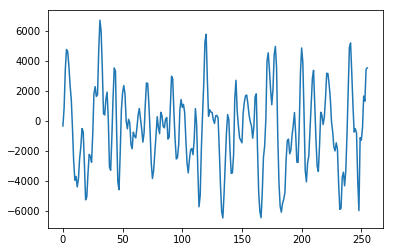

In [5]:
plt.plot(data[0:256].sum(1))

In [33]:
labels = IntervalTree()
skips = 0
label_span = 0
with open('data/OS_7_05_2019_08_24_00_labels.txt') as f:
    for start,end,label in csv.reader(f, delimiter='\t'):
        if start == '\\': continue
        label = label.strip().replace(' ', '')
        if 'call' in label or 'cll' in label or 'cal' in label:
            labels[int(float(start)*fs):int(float(end)*fs)] = 0
        elif 'buzz' in label:
            labels[int(float(start)*fs):int(float(end)*fs)] = 1
        elif 'whistle' in label:
            labels[int(float(start)*fs):int(float(end)*fs)] = 2
        else:
            skips += 1
            continue
        label_span += float(end)-float(start)

print('Loaded {} label regions (skipped {} unrecognized labels)'.format(len(labels),skips))
print('Positive label span is {} seconds'.format(label_span))
print('  - {} positive labels at stride {}'.format(int(label_span*fs)//stride,stride))

train_labels,test_labels = labels[:split],labels[split:]
print('Divided into {} train label regions, {} test label regions'.format(len(train_labels),len(test_labels)))

train_label_span = 0
for start,end,label in train_labels:
    end = min(end,split)
    train_label_span += end-start
print('Positive train label span is {} seconds'.format(train_label_span/fs))
print('  - {} data points at stride {}'.format(train_label_span//stride,stride))
print('  - {:.0f} percent of data has a positive label'.format(100*train_label_span/len(training_data)))

test_label_span = 0
for start,end,label in test_labels:
    start = max(start,split)
    test_label_span += end-start
print('Positive test label span is {} seconds'.format(train_label_span/fs))
print('  - {} data points at stride {}'.format(test_label_span//stride,stride))
print('  - {:.0f} percent of data has a positive label'.format(100*test_label_span/len(test_data)))

Loaded 418 label regions (skipped 105 unrecognized labels)
Positive label span is 586.2210539999992 seconds
  - 50492 positive labels at stride 512
Divided into 389 train label regions, 29 test label regions
Positive train label span is 542.1094557823129 seconds
  - 46693 data points at stride 512
  - 36 percent of data has a positive label
Positive test label span is 542.1094557823129 seconds
  - 3799 data points at stride 512
  - 15 percent of data has a positive label


62812151 62859627 47476 1.0765532879818593


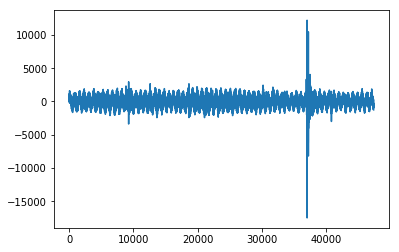

In [34]:
start,end,label = list(labels)[np.random.randint(len(labels))]

print(start,end,end-start,(end-start)/float(fs))
clip = data[start:end].sum(1)
plt.plot(clip)
display.Audio(clip,rate=fs)